In [28]:
import numpy as np
import pandas as pd
# import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
speed_dating_download = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

### Here is the original work from my capstone...

Random Forrest Classifier Accuracy = 0.8054740957966764
Gradient Boosting Classifier Accuracy = 0.8054740957966764


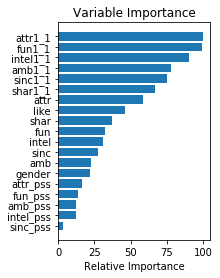

1_1 - Attribute Importance
_pss - Partner's Self Score


In [11]:
speed_dating2 = speed_dating_download.copy()

self_scores = speed_dating2[['iid','pid','attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]
speed_to_merge = speed_dating2[['iid','pid','attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1',
                                'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                                'dec','gender']]
self_scores.columns = ['pid', 'iid','attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss']
self_scores.head()

merged =  pd.merge(self_scores, speed_to_merge, on=['iid', 'pid'])
merged = merged.dropna()

speed_dating2 = merged.sample(frac=1)

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss','attr1_1',
                 'amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss',
               'attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1',
               'shar1_1','gender']]# taking the training data input 
test_y = test.dec# This is output of our training data



model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)

prediction = model.predict(test_X)

print('Random Forrest Classifier Accuracy = {}'.format(metrics.accuracy_score(prediction,test_y)))

pred_y = clf.predict(test_X)

# Accuracy table.
# table = pd.crosstab(test_y, pred_y)

print("Gradient Boosting Classifier Accuracy = {}".format(metrics.accuracy_score(pred_y,test_y)))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

print('1_1 - Attribute Importance\n_pss - Partner\'s Self Score')

### Based off of this, I created a neural network. It was slightly more accurate, but I had 2 layers of 1000 neurons each!!! 

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,1000))
mlp.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
mlp.score(train_X,train_y)

0.80620155038759689

### I'm going to do it again using the entire data set and then doing a cross-validation...

In [23]:
X = speed_dating2[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss','attr1_1',
                 'amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
Y = speed_dating2.dec# This is output of our training data

In [26]:
mlp2 = MLPClassifier(hidden_layer_sizes=(1000,1000))
mlp2.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [27]:
mlp2.score(X, Y)

0.80041061739257957

### It's interesting that the initial score is slightly lower... Now to try some cross validation scores... These are also lower... I wonder if it has to do with not having a lot of data to work with... 

In [29]:
cross_val_score(mlp2, X, Y, cv=5)

array([ 0.77785924,  0.77492669,  0.79545455,  0.79692082,  0.79897285])

### Changed the alpha to 0.001 and the layers to 2 layers of 100 neurons each. It ran much faster and actually is about the same in accuracy.

In [30]:
mlp3 = MLPClassifier(hidden_layer_sizes=(100,100), alpha=0.001)
mlp3.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
mlp3.score(X, Y)

0.81052940313829003

In [32]:
cross_val_score(mlp3, X, Y, cv=5)

array([ 0.77859238,  0.77639296,  0.78445748,  0.80205279,  0.79823918])

### I tried changing the activation function to sigmoid ('logistic')... It was slightly worse... :-/

In [33]:
mlp4 = MLPClassifier(hidden_layer_sizes=(100,100), alpha=0.001, activation= 'logistic')
mlp4.fit(X,Y) 

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
mlp4.score(X, Y)

0.78266608007039151

In [35]:
cross_val_score(mlp4, X, Y, cv=5)

array([ 0.76392962,  0.77199413,  0.77565982,  0.79618768,  0.76889215])